In [146]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [147]:
X

array([[-5.41731013e-01, -3.20575317e+00,  1.62587905e+00,
         2.48466055e+00, -5.43541678e+00],
       [ 8.00653953e-01, -2.65193611e-01, -1.69367001e+00,
        -1.26101063e+00,  2.29466901e+00],
       [-6.95466577e-01,  1.55002199e+00, -1.94448129e-01,
         2.62474015e+00, -2.59359279e+00],
       [-3.85377341e-01, -6.89381432e-01,  4.69559354e-01,
        -2.41188659e+00, -1.39524709e+00],
       [ 4.95828435e-01,  2.22062101e-02,  1.27748206e+00,
        -4.91761959e-01, -1.42650052e+00],
       [-7.55427720e-01, -3.17441069e-01,  2.02914036e+00,
        -1.47215356e+00, -2.58070409e+00],
       [-1.00329900e+00, -1.81303884e+00, -2.69203007e+00,
        -8.60528835e-01,  2.36277340e+00],
       [-1.53673612e+00,  1.77428243e+00, -1.83176638e+00,
        -8.64448309e-01,  3.06519155e+00],
       [-4.49127160e+00, -4.83460281e-01,  1.15848796e+00,
        -4.16051608e-01,  8.33437684e-01],
       [-1.65642208e+00,  4.99460797e-01, -3.14869927e-01,
        -1.21640026e+00

In [148]:
y

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [149]:
df  = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
df.head()

,col1,col2,col3,col4,col5,target
0,-0.541731,-3.205753,1.625879,2.484661,-5.435417,1
1,0.800654,-0.265194,-1.693670,-1.261011,2.294669,0
2,-0.695467,1.550022,-0.194448,2.624740,-2.593593,1
3,-0.385377,-0.689381,0.469559,-2.411887,-1.395247,1
4,0.495828,0.022206,1.277482,-0.491762,-1.426501,1


In [150]:
# Row Sampling
def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]), replace=True)

In [151]:
# Features Sampling
def sample_features(df, percent):
  newdf = df[random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))]
  newdf['target'] = df['target'].astype(int)
  return newdf

In [152]:
# Combined Sampling
def combined_sampling(df, r_percent, c_percent):
  return sample_features(sample_rows(df, r_percent), c_percent)

## Row Sampling

In [153]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [155]:
df1

,col1,col2,col3,col4,col5,target
23,-0.877476,-2.250666,-2.661440,-0.811517,2.985350,0
77,-0.303854,-0.737990,0.950497,-1.254287,-0.476327,0
32,-2.611962,3.130853,0.803715,-2.512687,0.098360,1
28,-1.438113,0.010696,0.137707,0.195602,-2.888272,1
68,0.588975,0.338933,-0.618982,-1.558343,-0.740834,0
50,-2.166136,0.092672,-0.130584,-0.202930,-2.990660,1
75,-1.042656,2.633943,0.891390,-2.003849,0.309927,1
0,-0.541731,-3.205753,1.625879,2.484661,-5.435417,1
2,-0.695467,1.550022,-0.194448,2.624740,-2.593593,1
68,0.588975,0.338933,-0.618982,-1.558343,-0.740834,0


In [156]:
dt1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
dt2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
dt3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[0] <= -0.423\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.5, 'x[2] <= -1.428\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

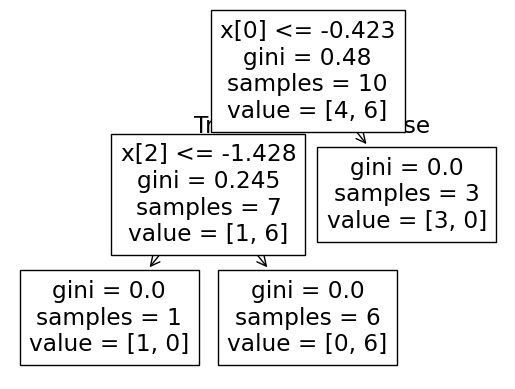

In [157]:
plot_tree(dt1)

[Text(0.5, 0.75, 'x[1] <= -0.257\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

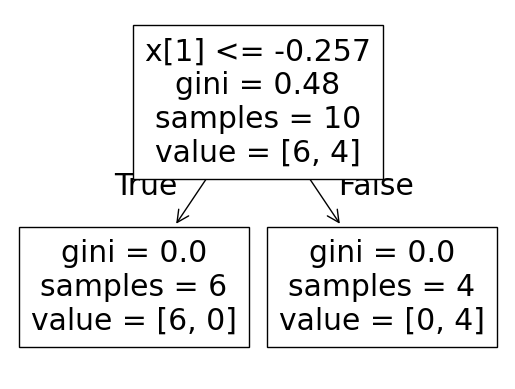

In [158]:
plot_tree(dt2)

[Text(0.5, 0.75, 'x[4] <= 1.344\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

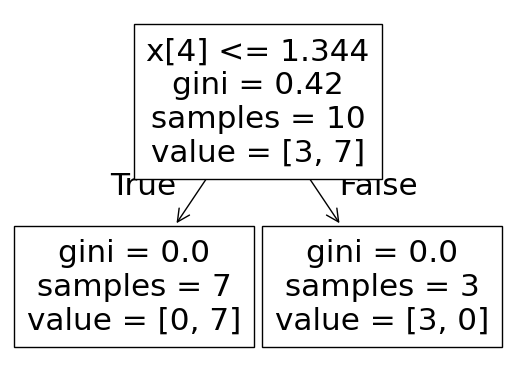

In [159]:
plot_tree(dt3)

In [160]:
dt1.predict(np.array([-0.617866, 3.102458, -0.201643,	1.442848,	-0.038911]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [161]:


dt2.predict(np.array([-0.617866, 3.102458, -0.201643,	1.442848,	-0.038911]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [162]:
dt3.predict(np.array([-0.617866, 3.102458, -0.201643,	1.442848,	-0.038911]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Column Sampling

In [163]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target'].astype(int)
<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target'].astype(int)
<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [165]:
dt1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
dt2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])
dt3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

In [166]:
df1

,col3,col5,col2,col4,target
0,1.625879,-5.435417,-3.205753,2.484661,1
1,-1.693670,2.294669,-0.265194,-1.261011,0
2,-0.194448,-2.593593,1.550022,2.624740,1
3,0.469559,-1.395247,-0.689381,-2.411887,1
4,1.277482,-1.426501,0.022206,-0.491762,1
...,...,...,...,...,...
95,0.474641,-0.241335,0.973936,-2.813847,1
96,0.848707,1.577031,1.607256,-3.957566,1
97,-1.634776,-1.336544,-1.903054,-0.913562,0
98,1.953528,-2.029197,-0.101234,-0.289507,1


[Text(0.6363636363636364, 0.9166666666666666, 'x[2] <= -0.22\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.45454545454545453, 0.75, 'x[1] <= -1.366\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.5454545454545454, 0.8333333333333333, 'True  '),
 Text(0.36363636363636365, 0.5833333333333334, 'x[2] <= -0.355\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[0] <= 0.043\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.25, 'x[3] <= -1.577\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.5833333333333334, 'gini = 0.0\nsamples = 34\nvalue 

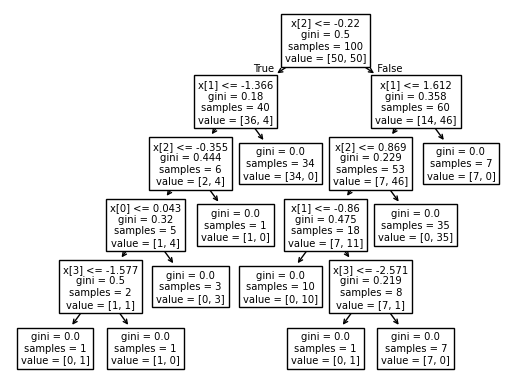

In [167]:
plot_tree(dt1)

[Text(0.6, 0.9166666666666666, 'x[1] <= -0.22\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4, 0.75, 'x[2] <= -1.366\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'x[3] <= 0.243\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2, 0.4166666666666667, 'x[1] <= -0.355\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.8, 0.75, 'x[2] <= 1.612\ngini = 0.358\nsamples = 60\nvalue = [14, 46]'),
 Text(0.7, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 'x[1] <= 0.869\ngini = 0.229\nsamples = 53\nvalue = [7, 46]'),
 Text(0.6, 0.4166666666666667, 'x[2] <= -0.86\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.5, 0.2

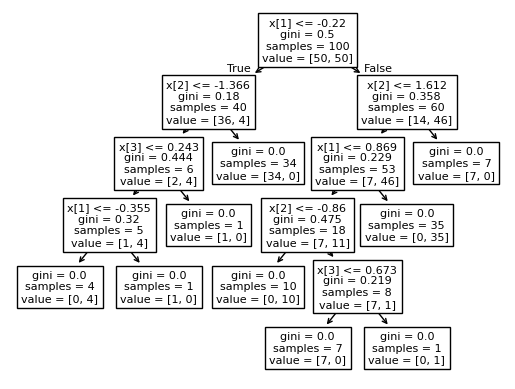

In [168]:
plot_tree(dt2)

[Text(0.6363636363636364, 0.9166666666666666, 'x[0] <= -0.22\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.45454545454545453, 0.75, 'x[3] <= -1.366\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.5454545454545454, 0.8333333333333333, 'True  '),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= -0.355\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[0] <= -1.185\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.25, 'x[2] <= 0.466\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.5833333333333334, 'gini = 0.0\nsamples = 34\nvalue 

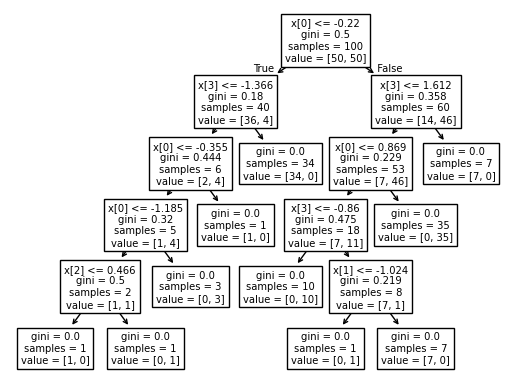

In [169]:
plot_tree(dt3)

In [173]:
dt1.predict(np.array([1.625879,	-5.435417,	-3.205753,	2.484661]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [174]:
dt2.predict(np.array([1.625879,	-5.435417,	-3.205753,	2.484661]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [175]:
dt3.predict(np.array([1.625879,	-5.435417,	-3.205753,	2.484661]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Combined Sampling

In [179]:
df1 = combined_sampling(df, 0.5, 0.5)
df2 = combined_sampling(df, 0.5, 0.5)
df3 = combined_sampling(df, 0.5, 0.5)

<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target'].astype(int)
<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target'].astype(int)
<ipython-input-151-c92b51ababf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,col4,col2,target
26,-2.590046,0.967206,1
82,-1.343195,-1.862359,0
12,-0.271717,-1.409050,0
51,-1.334813,-0.797189,0
32,-2.512687,3.130853,1
35,-0.563183,2.808940,1
11,-1.202427,-1.969981,0
14,-1.774367,1.999856,1
32,-2.512687,3.130853,1
17,-0.786744,-2.110426,0


In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [180]:
dt1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
dt2.fit(df2.iloc[:, 0:2], df2.iloc[:, -1])
dt3.fit(df3.iloc[:, 0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5833333333333334, 0.9285714285714286, 'x[1] <= 0.918\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.4166666666666667, 0.7857142857142857, 'x[0] <= -2.064\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.6428571428571429, 'x[0] <= -0.237\ngini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(0.4166666666666667, 0.5, 'x[0] <= -0.282\ngini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(0.25, 0.35714285714285715, 'x[0] <= -1.579\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[0] <= -1.619\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.08333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 19\nvalue = [1

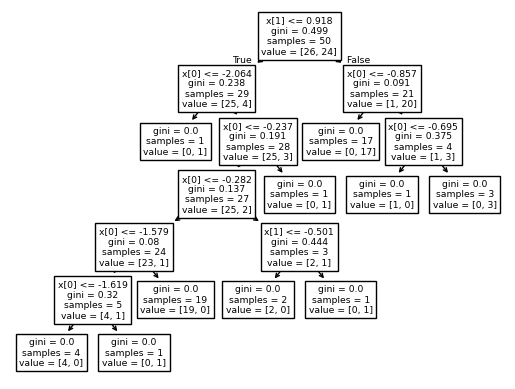

In [181]:
plot_tree(dt1)

[Text(0.6, 0.9166666666666666, 'x[1] <= -0.533\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.4, 0.75, 'x[1] <= -1.735\ngini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= -1.511\ngini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 0.398\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.25, 'x[1] <= -1.639\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= -0.889\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8, 0.25, 'x[0] <= -1.434\ngini = 0.32\nsamples = 5\nvalue = [4

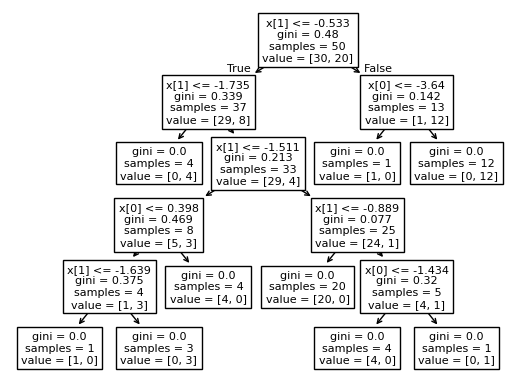

In [182]:
plot_tree(dt2)

[Text(0.4230769230769231, 0.9285714285714286, 'x[0] <= -1.531\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.34615384615384615, 0.7857142857142857, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3846153846153846, 0.8571428571428572, 'True  '),
 Text(0.5, 0.7857142857142857, 'x[1] <= -0.67\ngini = 0.433\nsamples = 41\nvalue = [13.0, 28.0]'),
 Text(0.46153846153846156, 0.8571428571428572, '  False'),
 Text(0.4230769230769231, 0.6428571428571429, 'x[1] <= -1.447\ngini = 0.497\nsamples = 28\nvalue = [13, 15]'),
 Text(0.15384615384615385, 0.5, 'x[1] <= -1.568\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.07692307692307693, 0.35714285714285715, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.23076923076923078, 0.35714285714285715, 'x[0] <= -0.064\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.15384615384615385, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue

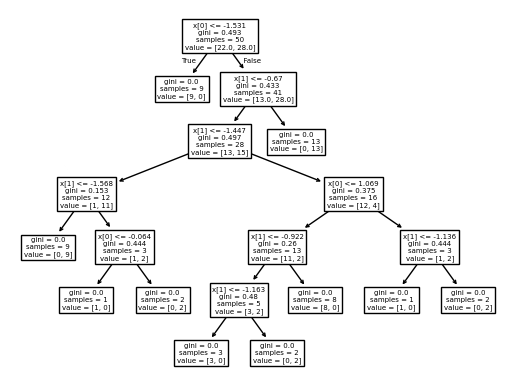

In [183]:
plot_tree(dt3)

In [186]:
dt1.predict(np.array([-2.590046,	0.967206]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [189]:
dt2.predict(np.array([-2.590046,	0.967206]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [190]:
dt3.predict(np.array([-2.590046,	0.967206]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Main Advantage of Random Forest

## LBHV -> LBLV

In [191]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [194]:
np.random.seed(42)

X,y = make_circles(n_samples=500, noise=0.35, factor=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

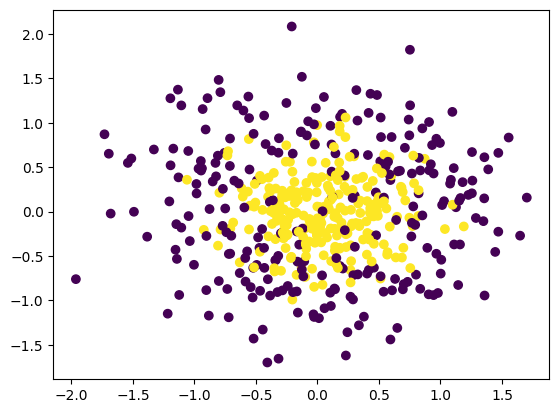

In [196]:
plt.scatter(X[:,0],X[:,1],c=y)

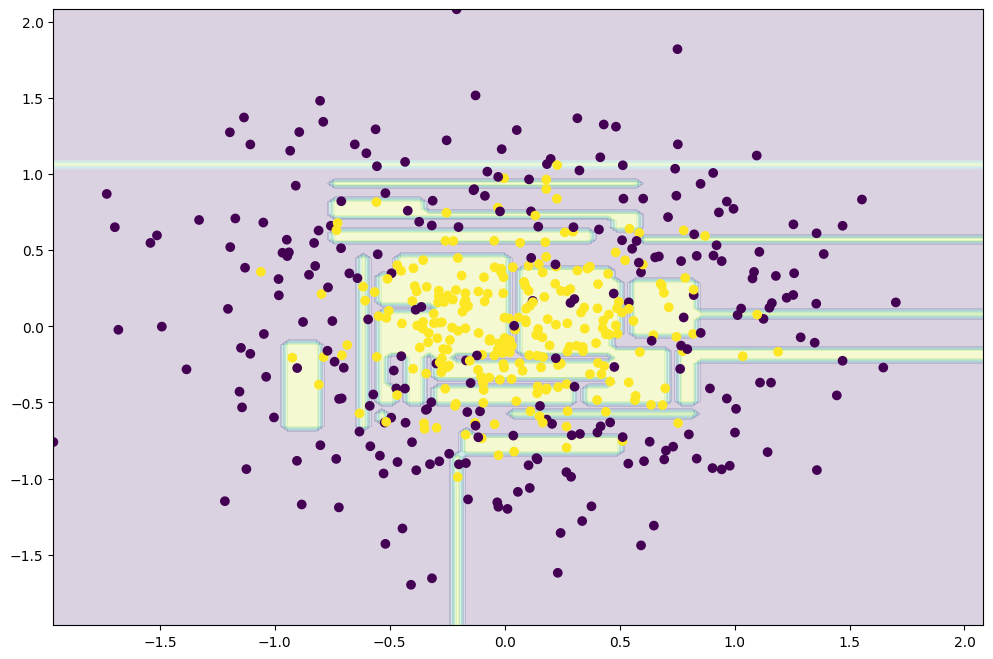

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

y_pred = dt.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx1, xx2, y_pred, alpha=0.2, cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

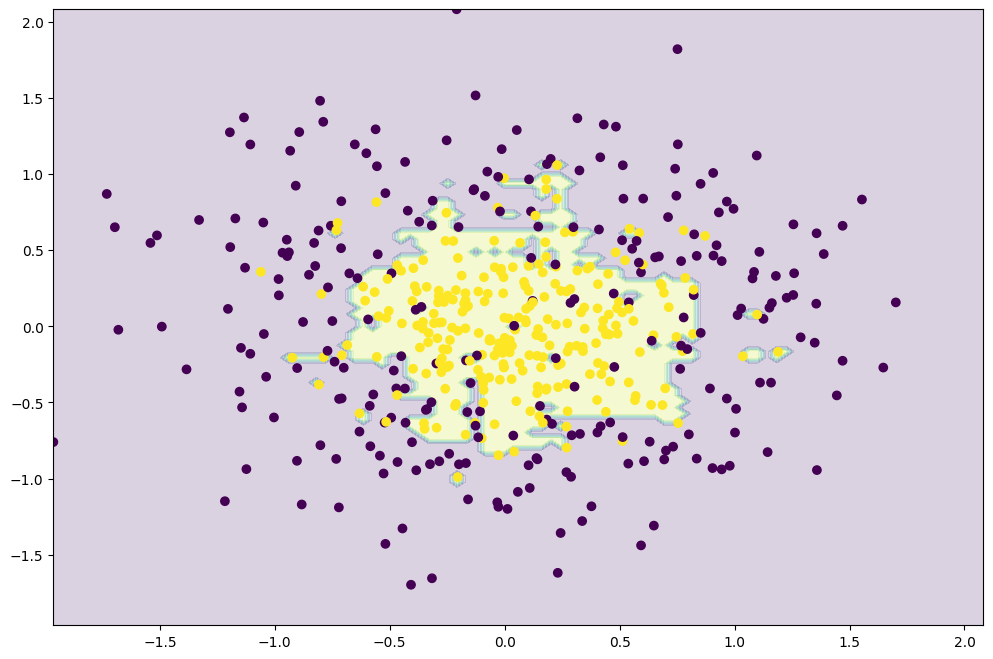

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

y_pred = rf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx1, xx2, y_pred, alpha=0.2, cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

# OOB Score

In [203]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

rf.oob_score_

0.76

In [204]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.85